In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer, load_iris
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
faulty = pd.read_csv('faults.csv')
faulty.head()
# read the dataset from csv

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
faulty.isnull().sum() # find the sum of the nulls in the df

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [4]:
faulty['All_faults'] = faulty[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].idxmax(axis=1)
#creating a new column called 'All_faults' in the faulty DataFrame, where each row is labeled with the type of fault

In [5]:
faulty.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,All_faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


In [6]:
faulty = faulty.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1) 
# deleting the columns after adding them to the all faults column

In [7]:
faulty

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,All_faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


In [8]:
faulty['All_faults'].replace('Pastry',1,inplace=True)
faulty['All_faults'].replace('Z_Scratch',2,inplace=True)
faulty['All_faults'].replace('K_Scatch',3,inplace=True)
faulty['All_faults'].replace('Stains',4,inplace=True)
faulty['All_faults'].replace('Dirtiness',5,inplace=True)
faulty['All_faults'].replace('Bumps',6,inplace=True)
faulty['All_faults'].replace('Other_Faults',7,inplace=True)
faulty.head()  # replacing the strings with ints to be able to work with it

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,All_faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [9]:
faulty.duplicated().sum() #check for duplicates

0

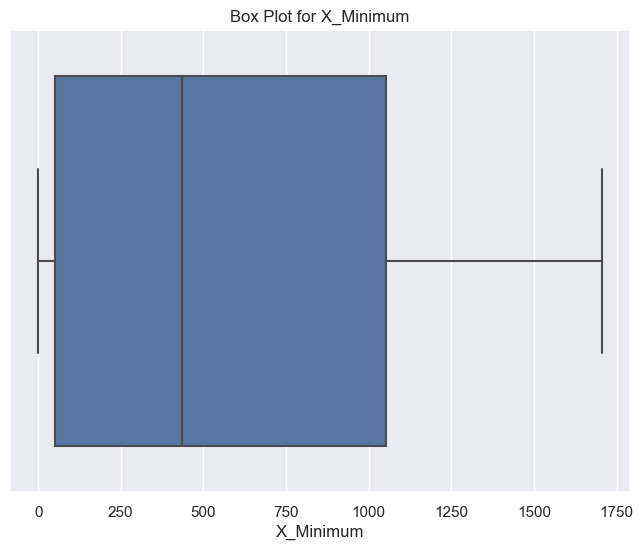

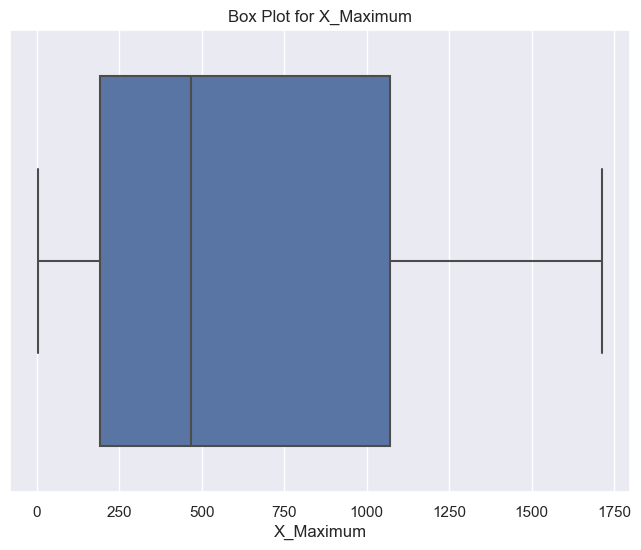

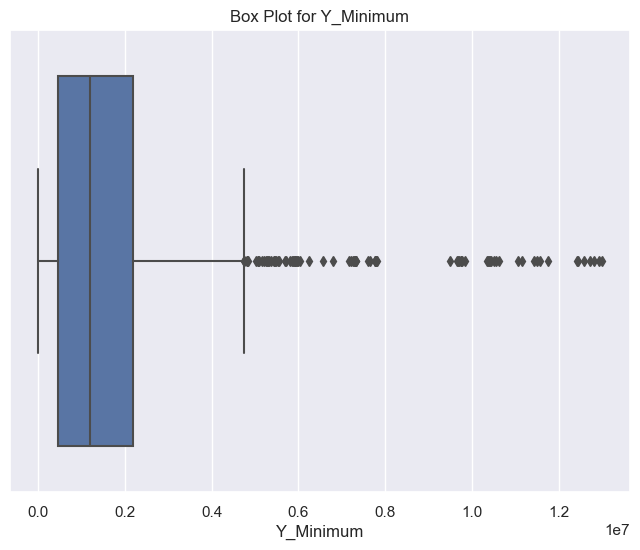

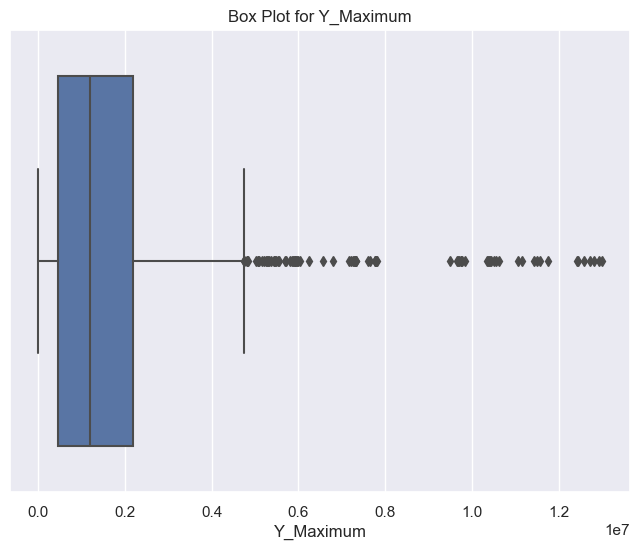

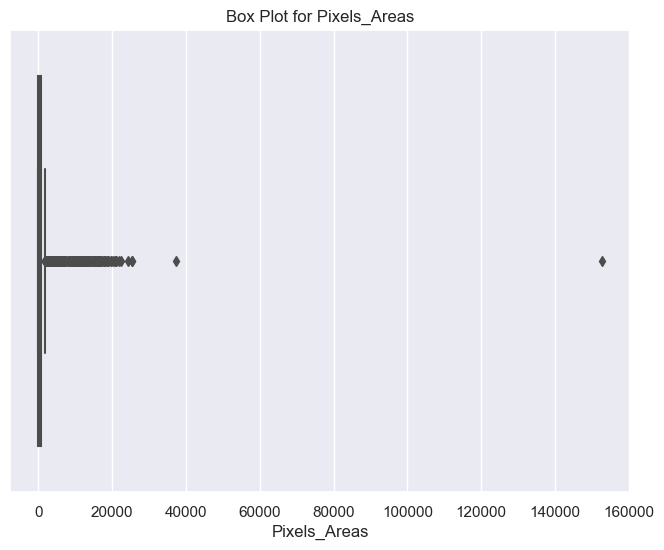

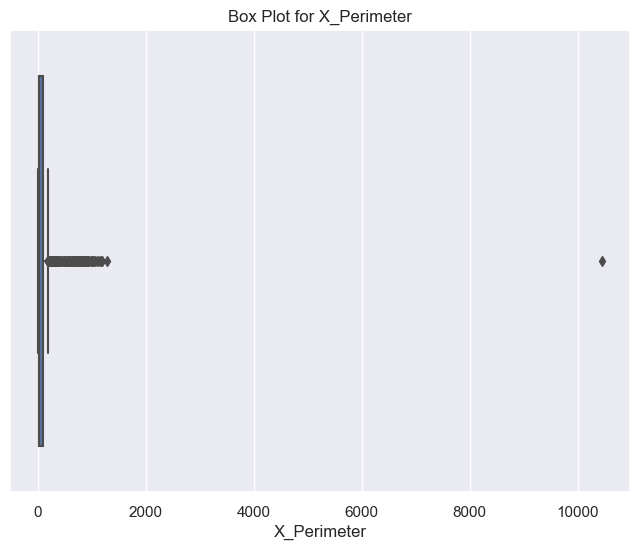

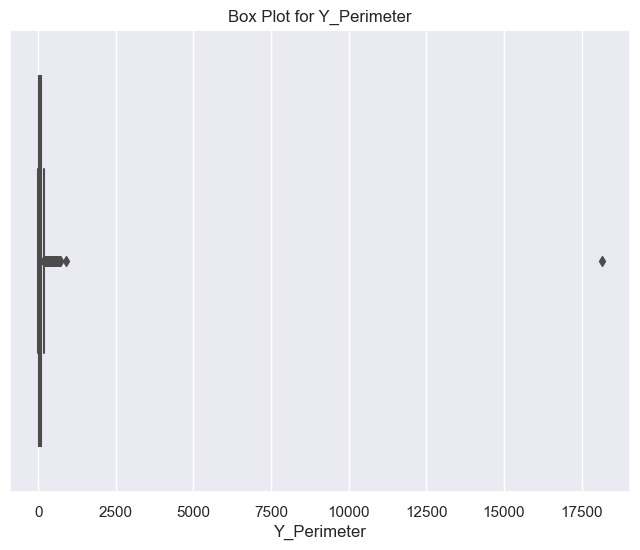

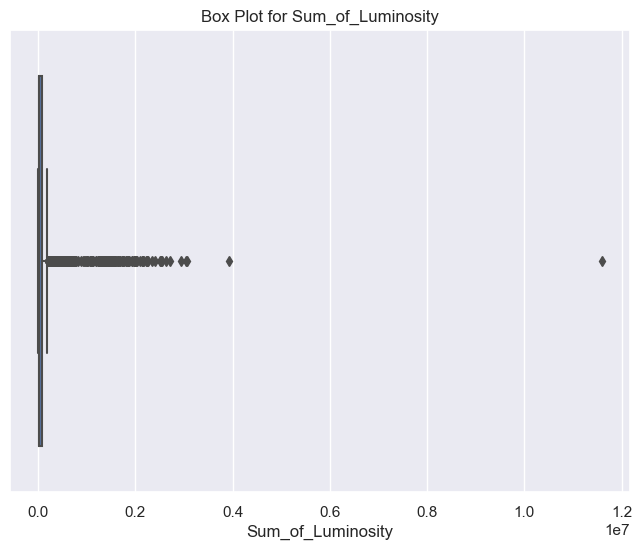

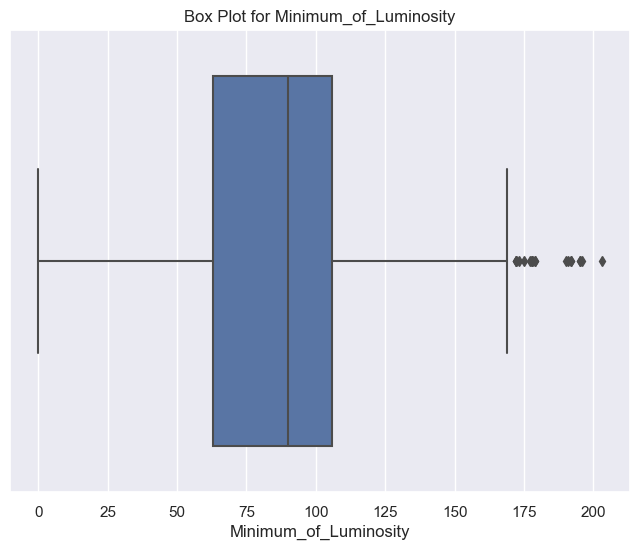

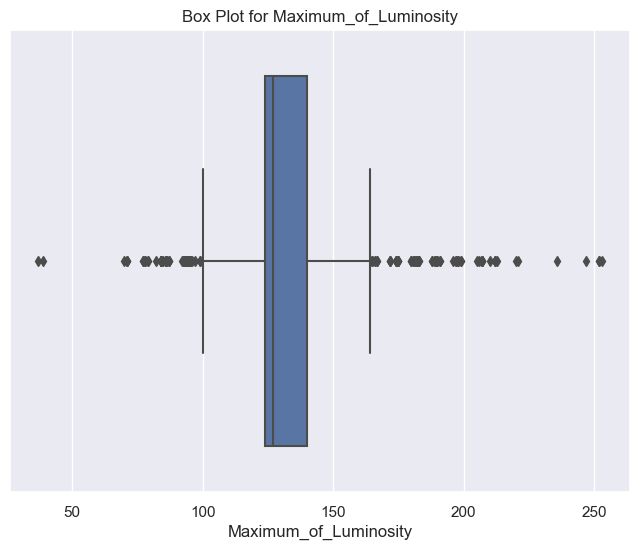

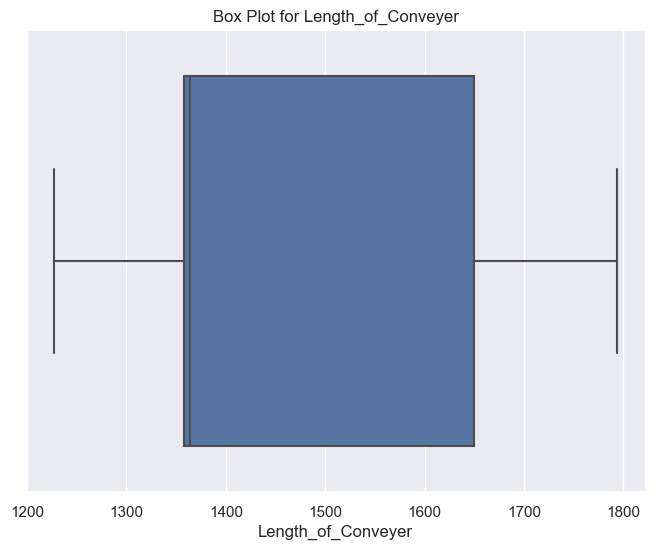

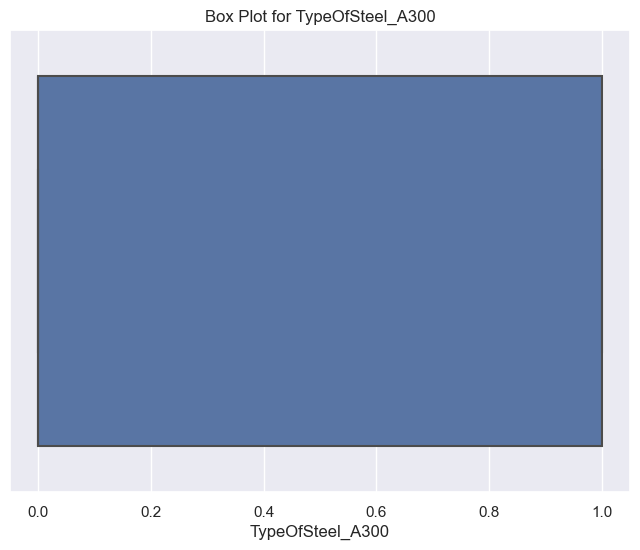

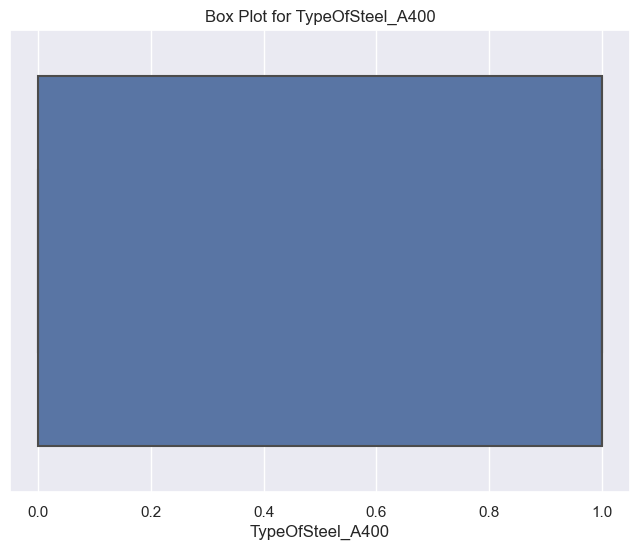

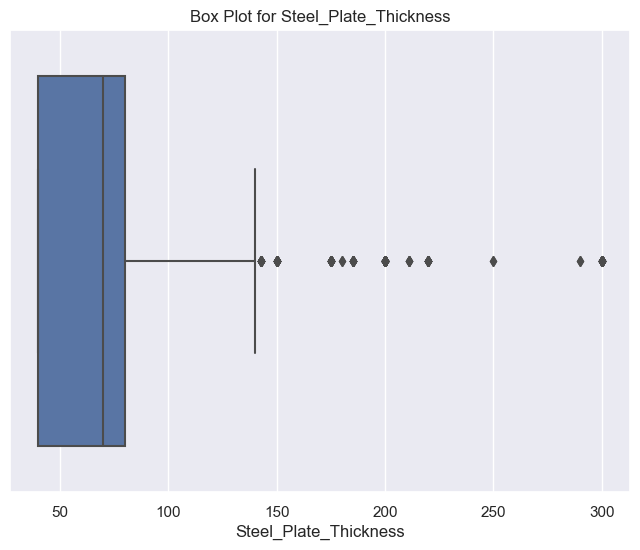

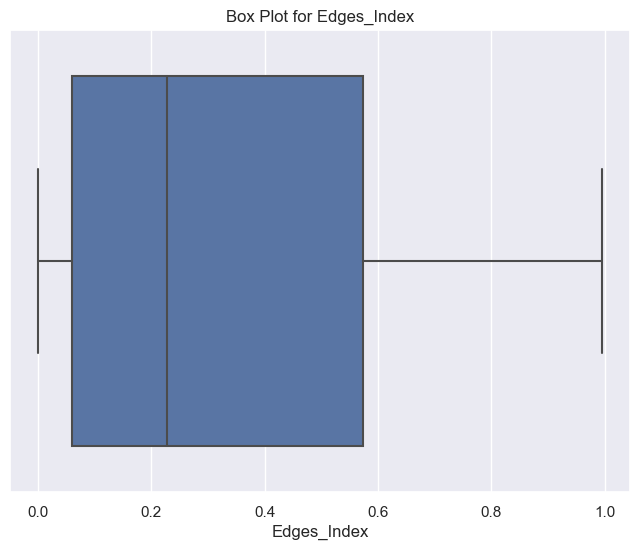

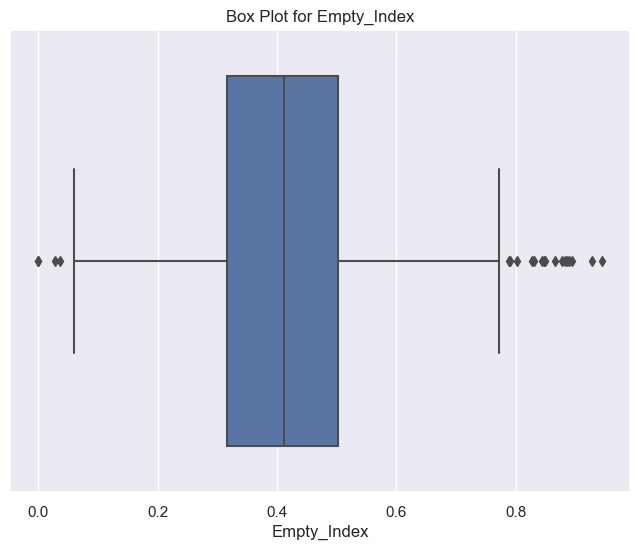

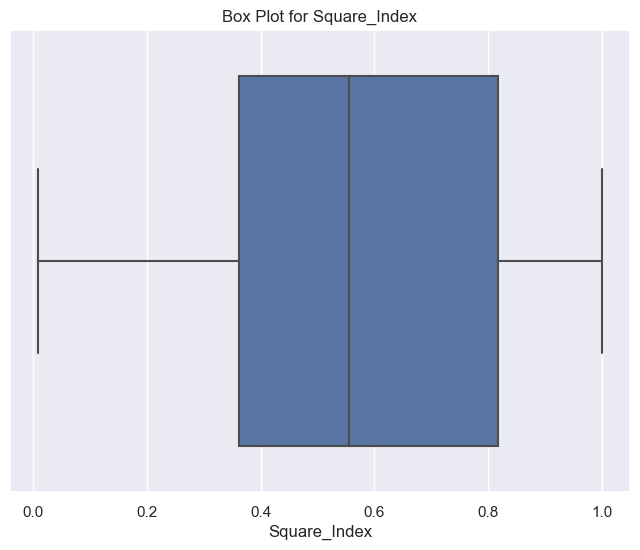

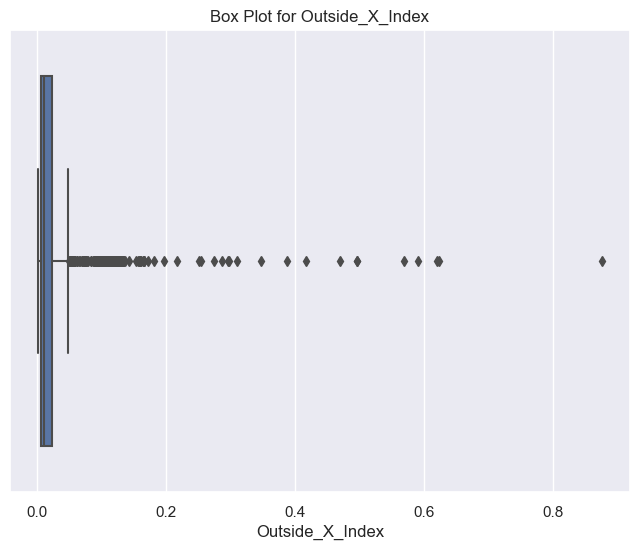

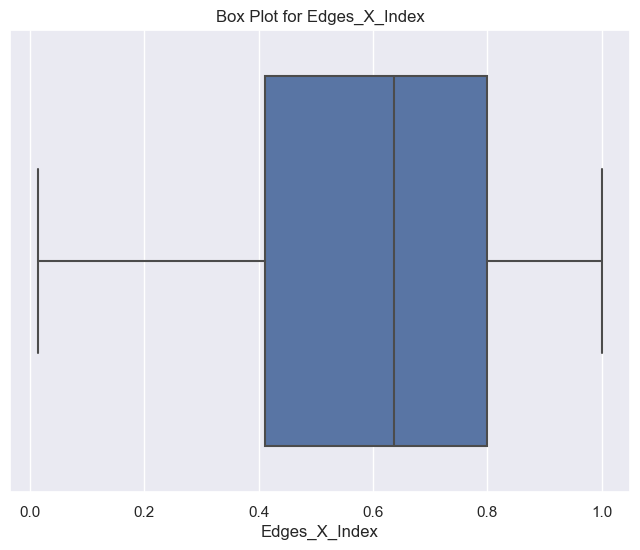

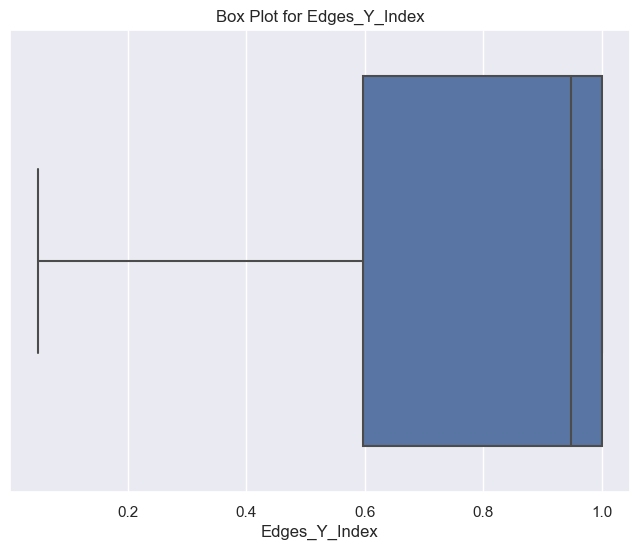

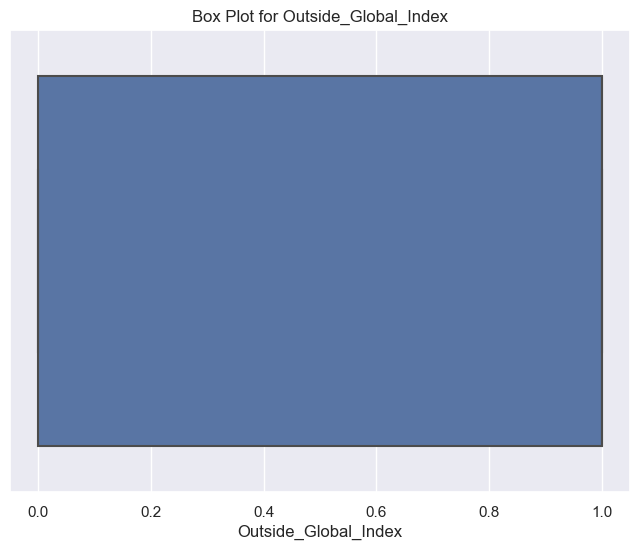

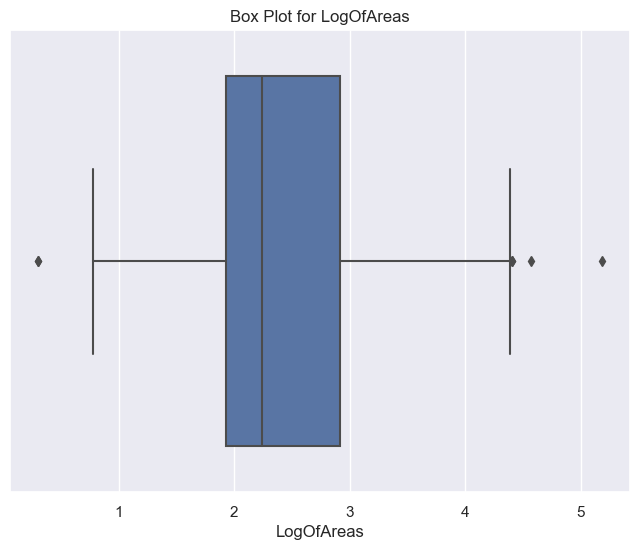

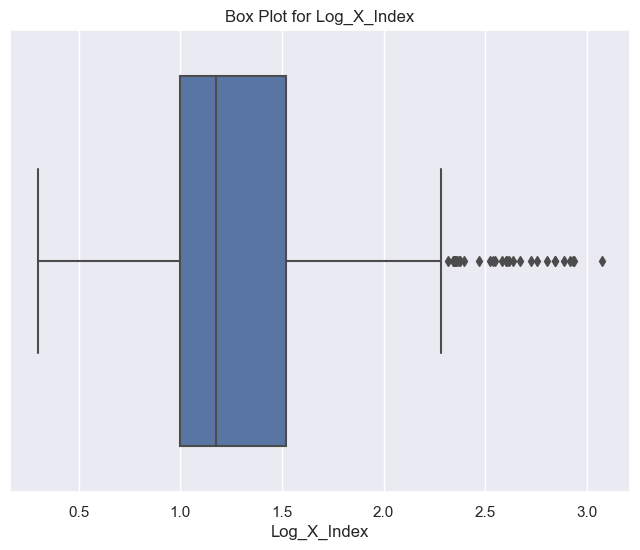

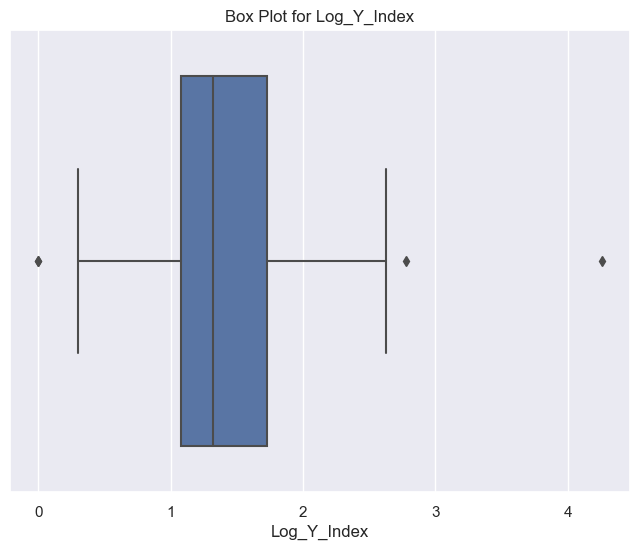

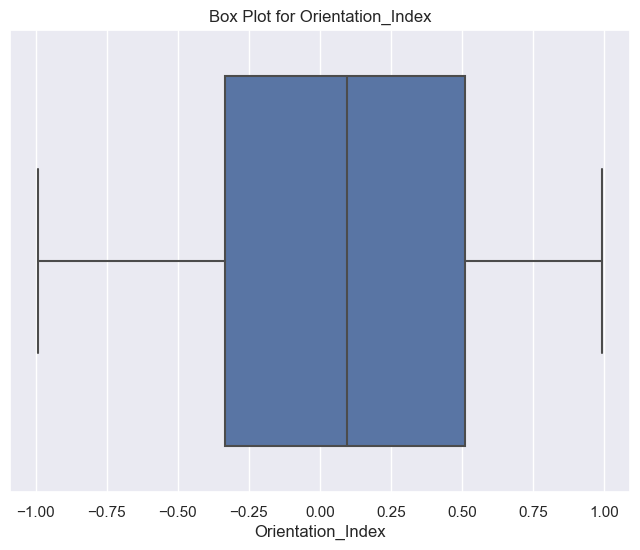

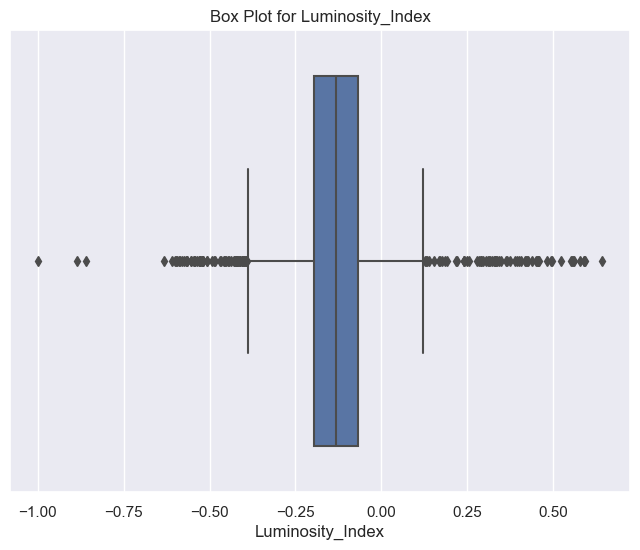

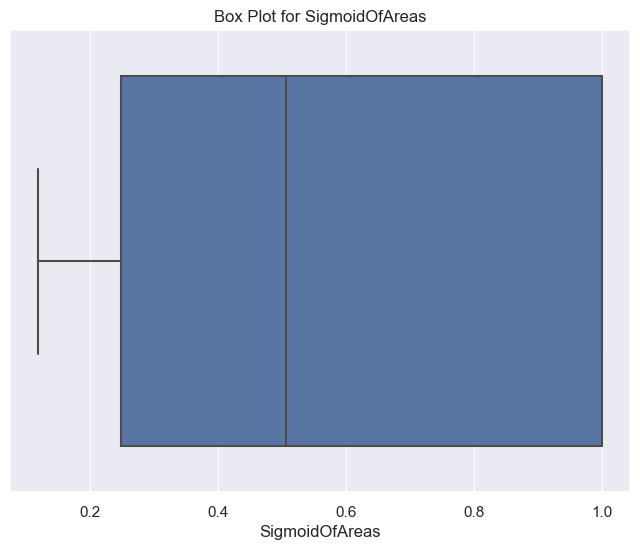

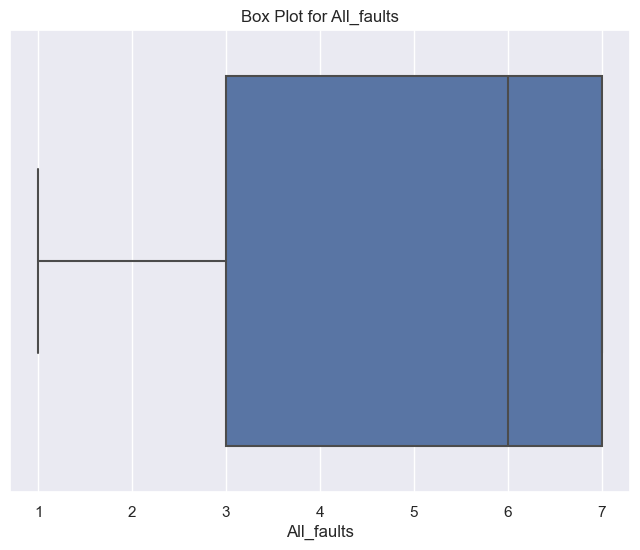

In [10]:
for column in faulty.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=faulty[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show() 
    #box plot for outliers

In [11]:
fault_features = faulty.drop(['All_faults'], axis=1)

# Standardize the data
scaler = StandardScaler()
fault_scaled = scaler.fit_transform(fault_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)  
faulty['Cluster'] = kmeans.fit_predict(fault_scaled)

# Count the number of points in each cluster
cluster_counts = faulty['Cluster'].value_counts()

# Set a threshold for cluster size 
threshold = 200
outlier_clusters = cluster_counts[cluster_counts < threshold].index

# Identify and remove outliers
outliers = faulty[faulty['Cluster'].isin(outlier_clusters)]
faulty_no_outliers = faulty[~faulty['Cluster'].isin(outlier_clusters)]

# Print information about removed outliers
print(f"Number of outliers removed: {len(outliers)}")
print("Outlier clusters:", outlier_clusters)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of outliers removed: 57
Outlier clusters: Index([0, 6], dtype='int32', name='Cluster')


In [12]:
faulty_no_outliers

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,All_faults,Cluster
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,5
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,5
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,7,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,7,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,7,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,7,3


In [13]:
xz = faulty.iloc[:, :-1]
yz = faulty['All_faults']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xz, yz, test_size=0.3, random_state=42)


In [58]:
rf1 = RandomForestClassifier(n_estimators=25, max_leaf_nodes=7, n_jobs=-1, random_state=42)
rf1.fit(x_train, y_train)

# Prediction on the test set
y_predef = rf1.predict(x_test)

print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.902
Accuracy on test set: 0.904


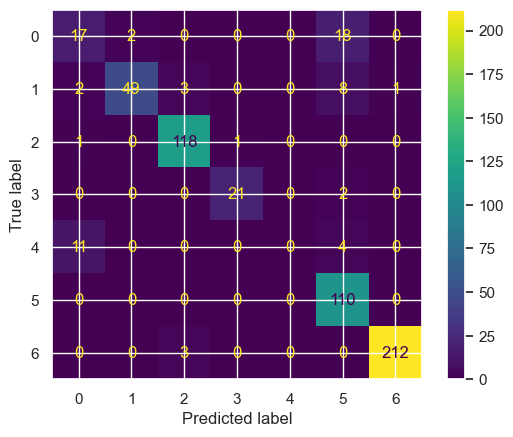

In [59]:
# generating the confusion matrix on the ensemble model 'voting' 
y_pred = rf1.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [17]:
xnew = faulty_no_outliers.iloc[:, :-1]
ynew = faulty_no_outliers['All_faults']

In [18]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(xnew, ynew, test_size=0.3, random_state=42)

In [60]:
rf2 = RandomForestClassifier(n_estimators=25, max_leaf_nodes=7, n_jobs=-1, random_state=42)
rf2.fit(x_train0, y_train0)

# Prediction on the test set
y_predef2 = rf2.predict(x_test0)

# Evaluate the model

print("Accuracy on training set: {:.3f}".format(rf2.score(x_train0, y_train0)))
print("Accuracy on test set: {:.3f}".format(rf2.score(x_test0, y_test0)))

Accuracy on training set: 0.904
Accuracy on test set: 0.887


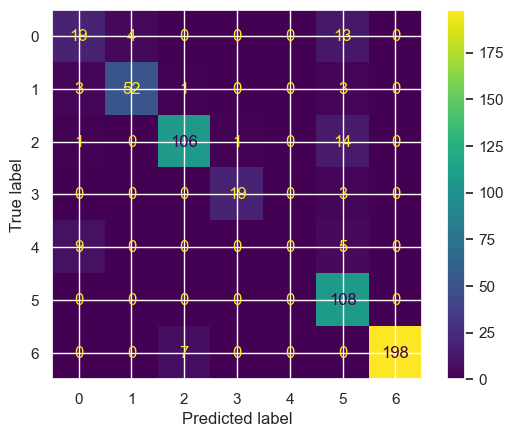

In [61]:
# generating the confusion matrix on the ensemble model
y_pred2 = rf2.predict(x_test0)
confusion = confusion_matrix(y_test0, y_pred2)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

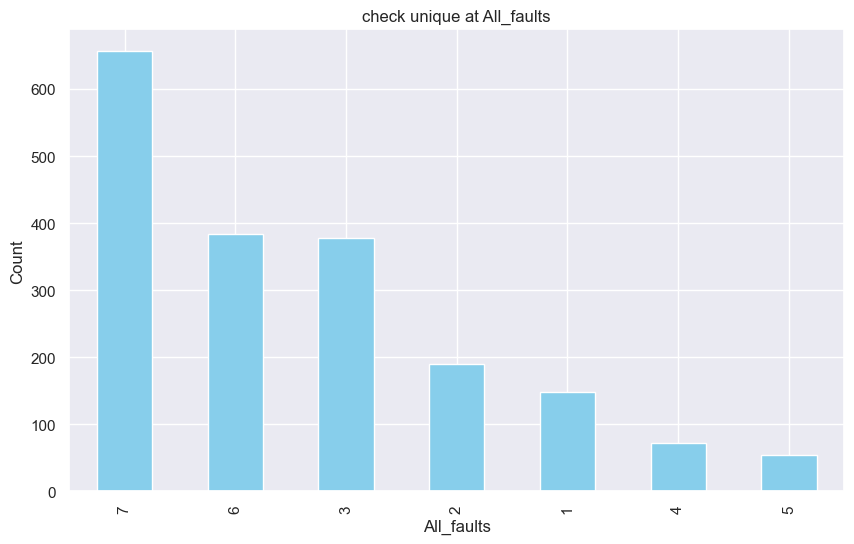

In [44]:
column_name = 'All_faults' 
value_counts = faulty_no_outliers[column_name].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title(f'check unique at {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.show()

In [45]:
count = faulty_no_outliers['All_faults'].value_counts()
print(count)

All_faults
7    656
6    384
3    378
2    190
1    149
4     72
5     55
Name: count, dtype: int64


In [46]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(x_train0, y_train0)

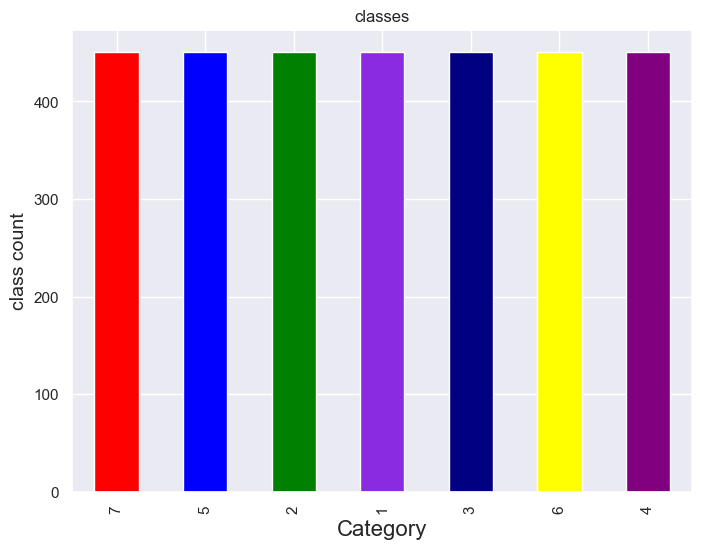

In [47]:
x = overY.value_counts().plot(kind='bar', color=['red', 'blue', 'green','blueviolet','navy','yellow','purple'],
                              title='classes', figsize=(8, 6))

# Customize the plot
plt.xticks(range(len(overY.unique())), overY.unique())
x.set_xlabel("Category", fontsize=16)
x.set_ylabel("class count", fontsize=14)

# Show the plot
plt.show()

In [62]:
rf3 = RandomForestClassifier(n_estimators=25, max_leaf_nodes=7, n_jobs=-1, random_state=42)
rf3.fit(overX, overY)



# Evaluate the model

print("Accuracy on training set: {:.3f}".format(rf3.score(overX, overY)))
print("Accuracy on test set: {:.3f}".format(rf3.score(x_test0, y_test0)))

Accuracy on training set: 0.936
Accuracy on test set: 0.898


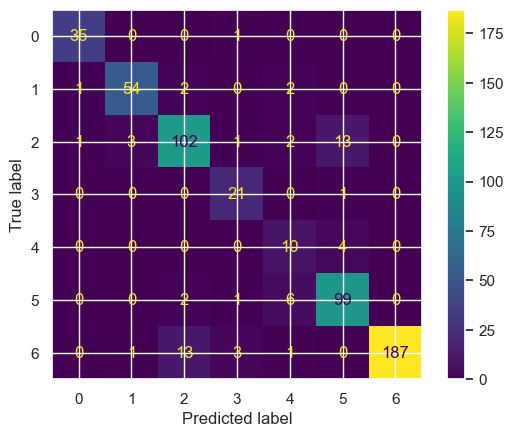

In [63]:
# generating the confusion matrix on the model
y_pred3 = rf3.predict(x_test0)
confusion = confusion_matrix(y_test0, y_pred3)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [49]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(x_train0, y_train0)

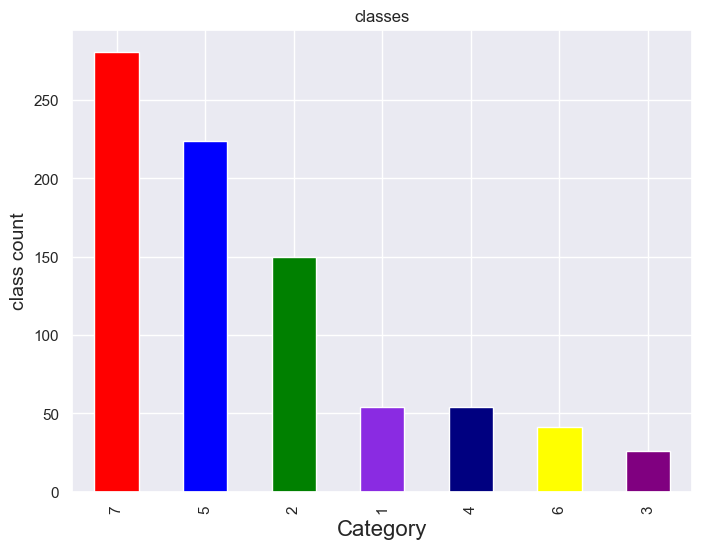

In [50]:
x = y_res.value_counts().plot(kind='bar', color=['red', 'blue', 'green','blueviolet','navy','yellow','purple'],
                              title='classes', figsize=(8, 6))

# Customize the plot
plt.xticks(range(len(y_res.unique())), y_res.unique())
x.set_xlabel("Category", fontsize=16)
x.set_ylabel("class count", fontsize=14)

# Show the plot
plt.show()

In [64]:
rf4 = RandomForestClassifier(n_estimators=25, max_leaf_nodes=7, n_jobs=-1, random_state=42)
rf4.fit(X_res, y_res)



# Evaluate the model

print("Accuracy on training set: {:.3f}".format(rf4.score(X_res, y_res)))
print("Accuracy on test set: {:.3f}".format(rf4.score(x_test0, y_test0)))

Accuracy on training set: 0.922
Accuracy on test set: 0.853


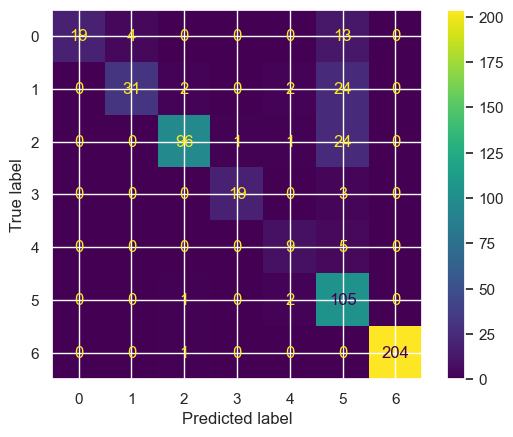

In [65]:
y_pred4 = rf4.predict(x_test0)
confusion = confusion_matrix(y_test0, y_pred4)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

In [52]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42,smote=SMOTE(k_neighbors=2))
X, y = smt.fit_resample(x_train0, y_train0)

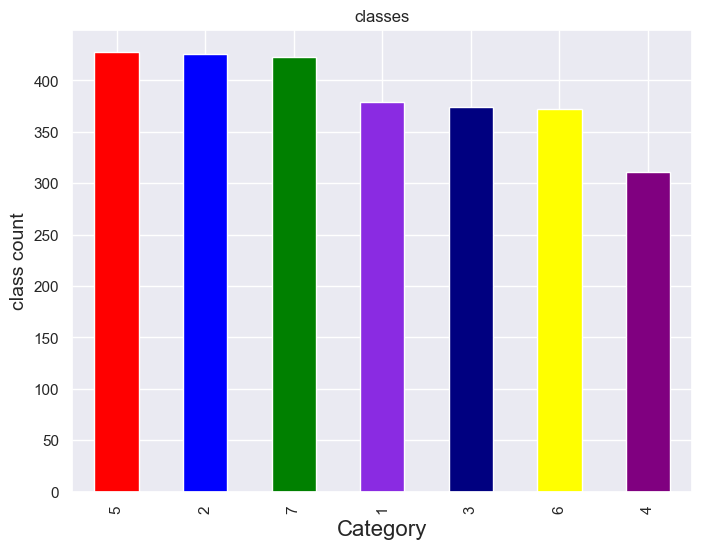

In [53]:
x = y.value_counts().plot(kind='bar', color=['red', 'blue', 'green','blueviolet','navy','yellow','purple'],
                              title='classes', figsize=(8, 6))

# Customize the plot
plt.xticks(range(len(y.unique())), y.unique())
x.set_xlabel("Category", fontsize=16)
x.set_ylabel("class count", fontsize=14)

# Show the plot
plt.show()

In [66]:
rf5 = RandomForestClassifier(n_estimators=25, max_leaf_nodes=7, n_jobs=-1, random_state=42)
rf5.fit(X, y)



# Evaluate the model

print("Accuracy on training set: {:.3f}".format(rf5.score(X, y)))
print("Accuracy on test set: {:.3f}".format(rf5.score(x_test0, y_test0)))

Accuracy on training set: 0.868
Accuracy on test set: 0.666


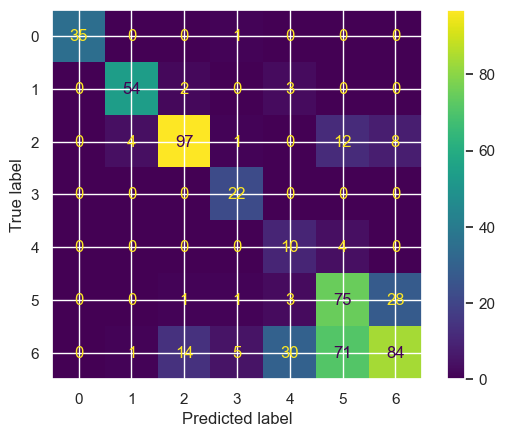

In [68]:
y_pred5 = rf5.predict(x_test0)
confusion = confusion_matrix(y_test0, y_pred5)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()